# Water Toxin Releases in Pittsburgh

The WPRDC Toxic Releases in water provides a dataset that lets you see the total release of chemicals per lb into the water by different facilities. This information allows you to determine what neighborhoods has cleanest water with the least pollutants. It also helps you identify the neighborhoods with high amounts of toxic releases, making sure you avoid drinking water from them. 

Start by importing pandas and reading in the data 

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

watertoxdata = pd.read_csv("https://data.wprdc.org/datastore/dump/c9baaa77-2dc5-494c-a2ce-f90db9106df2")

Dataset is for Alleghany County, so we first sort out everything besides the city of Pittsburgh. We also sort out all the columns that are relevant. 

In [121]:
filtered_data = watertoxdata[watertoxdata['CITY_NAME'].str.contains('PITTSBURGH', case=False, na=False)]
columns_to_display = ['FACILITY_NAME', 'STREET_ADDRESS',  'CITY_NAME', 'ZIP_CODE', 'CHEM_NAME', 'CARCINOGEN', 'CLEAN_AIR', 'TOTAL_RELEASE']
filtered_data[columns_to_display].head()

,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,ZIP_CODE,CHEM_NAME,CARCINOGEN,CLEAN_AIR,TOTAL_RELEASE
0,PRUETT-SCHAFFER CHEMICAL CO INC.,3327 STAFFORD ST,PITTSBURGH,15204,Xylene (mixed isomers),N,Y,NaN
3,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,Methyl ethyl ketone,N,N,NaN
4,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,Methanol,N,Y,NaN
5,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,"1,2,4-Trimethylbenzene",N,N,NaN
6,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,15233,Toluene,N,Y,NaN


Here we sort the data and figure out the zip code with the highest total release of chemicals (per lb) into the water. The majority is from facilities in 15225 which encompasses the Neville Township. We also remove any rows that have a null total release value. A few zip codes that are identical but have extensions are also removed. 

In [123]:
filtered_data = filtered_data.dropna(subset=['TOTAL_RELEASE'])

filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152251516]
filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152042599]
filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152206246]
filtered_data = filtered_data[filtered_data['ZIP_CODE'] != 152342624]


filtered_data = filtered_data.sort_values(by='TOTAL_RELEASE', ascending=False)
filtered_data[columns_to_display].head()


,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,ZIP_CODE,CHEM_NAME,CARCINOGEN,CLEAN_AIR,TOTAL_RELEASE
10330,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,197243.0
13890,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,160995.0
8662,LTV STEEL COMPANY INC PITTSBURGH WORKS,4650 SECOND AVENUE,PITTSBURGH,15207,Ammonia,N,N,150000.0
13488,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,132370.0
12201,SHENANGO INC,200 NEVILLE RD,PITTSBURGH,15225,Ammonia,N,N,92000.0


We group together the total releases of each zipcode to make the data more centralized. 

In [125]:
zip_code_totals = filtered_data.groupby('ZIP_CODE')['TOTAL_RELEASE'].sum()

We find the zip codes with the most total releases (worst ones to live at)

In [130]:
worst_zip_codes = zip_code_totals.sort_values(ascending=False).head(5)
worst_zip_codes

ZIP_CODE
15225    1542450.60
15207     771586.00
15201     139734.71
15236         48.00
15226         21.00
Name: TOTAL_RELEASE, dtype: float64

Here the zipcodes we replace the zipcodes with neighborhoods. The second line of code converts the keys in the zip_to_name dictionary to integers and keeps the corresponding values the same. This is needed as the zip codes cannot be used as an index without being integers.  

In [134]:
zip_to_name = {
    '15525': "Neville",
    '15207': 'Greenfield, New Homestead, Lincoln Place, Glen Hazel, Hazelwood, Hays',
    '15201': 'Central Lawrenceville, Lower Lawrenceville, Upper Lawrenceville, Stanton Heights, Polish Hill',
    '15236': 'Pleasant HIlls, South Park, Whitehall, Baldwin',
    '15226': 'Brookline, Overbrook, Beechview, Bon Air, Baldwin'
}

zip_to_name = {int(i): v for i, v in zip_to_name.items()}

worst_neighborhoods = worst_zip_codes.rename(index=zip_to_name)

worst_neighborhoods

ZIP_CODE
15225                                                                                            1542450.60
Greenfield, New Homestead, Lincoln Place, Glen Hazel, Hazelwood, Hays                             771586.00
Central Lawrenceville, Lower Lawrenceville, Upper Lawrenceville, Stanton Heights, Polish Hill     139734.71
Pleasant HIlls, South Park, Whitehall, Baldwin                                                        48.00
Brookline, Overbrook, Beechview, Bon Air, Baldwin                                                     21.00
Name: TOTAL_RELEASE, dtype: float64

Now these are the best zipcodes with no releases into the water at all. 

In [137]:
top_zip_codes = zip_code_totals.sort_values(ascending=True).head(5)
top_zip_codes

ZIP_CODE
15204     0.0
15219     0.0
15233     0.0
15275     0.0
15226    21.0
Name: TOTAL_RELEASE, dtype: float64

Here we display them as neighboorhoods. 

In [140]:
zip_name = {
    '15204': 'Crafton Heights, Windgap, Chartiers, Sheraden, Esplen',
    '15219': 'Market Square, Cultural District, The Point, West Oakland, Crawford-Roberts',
    '15233': 'Central Northside, Marshall-Shadeland, Allegheny West, Manchester',
    '15275': 'North Fayette',
    '15226': 'Brookline, Overbrook, Beechview, Bon Air, Baldwin'
}

zip_name = {int(i): v for i, v in zip_name.items()}
top_neighborhoods = top_zip_codes.rename(index=zip_name)
top_neighborhoods

ZIP_CODE
Crafton Heights, Windgap, Chartiers, Sheraden, Esplen                           0.0
Market Square, Cultural District, The Point, West Oakland, Crawford-Roberts     0.0
Central Northside, Marshall-Shadeland, Allegheny West, Manchester               0.0
North Fayette                                                                   0.0
Brookline, Overbrook, Beechview, Bon Air, Baldwin                              21.0
Name: TOTAL_RELEASE, dtype: float64

This is the data visualized for most waste and least released toxins (Displayed as zipcodes to read easier)

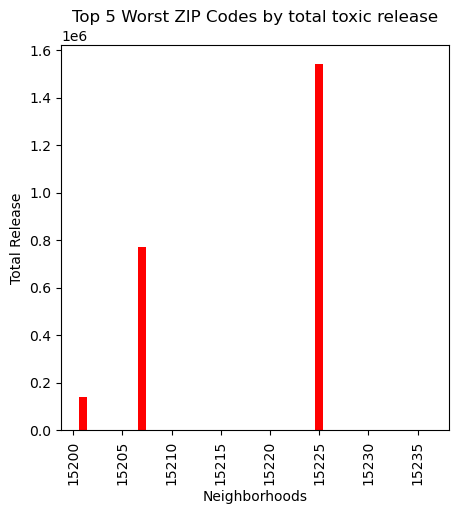

In [177]:
plt.figure(figsize=(5, 5))
plt.bar(worst_zip_codes.index, worst_zip_codes.values, color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Total Release')
plt.title('Top 5 Worst ZIP Codes by total toxic release')
plt.show() 


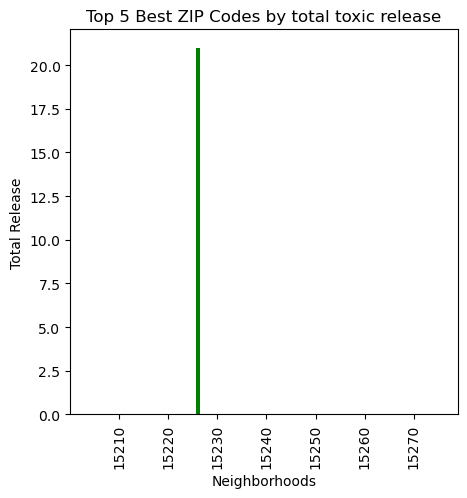

In [181]:
plt.figure(figsize=(5, 5))
plt.bar(top_zip_codes.index, top_zip_codes.values, color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Total Release')
plt.title('Top 5 Best ZIP Codes by total toxic release')
plt.show() 


# Conclusion

There are a couple of neighborhoods with zero toxic releases into the water so we're displaying them as zipcodes

1. 15204 (0)
2. 15219 (0)
3. 15233 (0)
4. 15275 (0)
5. 15226 (21)